# Project 5 Emotion detection ([FER-2013 dataset](https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer))

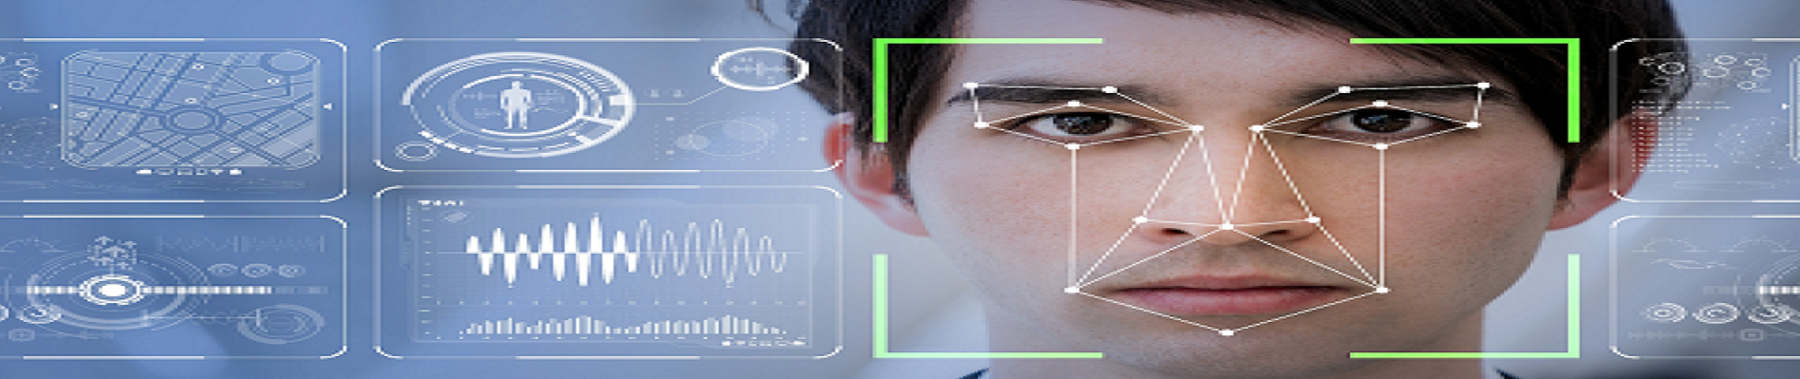


### Project Rules:
- Use object Oriented Programming.
- Use Pytorch-Lightning. 
- Do not use pre-trained models.
- ○	Create three pytorch classes:
■	First Class for loading and preprocessing the data
■	Second Class for dataset
■	Third Class for building the model.


### Project Protocol:  
- Select one of the problems above
- Download the dataset of the selected problem.
- Read/load the problem’s dataset.
- Identify the features and the targets.
- Perform the necessary preprocessing steps (if needed).
- Split data into Training, Validation, and Testing sets (if needed).
- Design the architecture for building the model.
- Define the loss function and the performance measures.
- Train and Validate the model using (Train and validation sets).
- Plot the loss/performance of Train and Validation using both tensorboard and matplotlib.
- Evaluate the model using the Test set.

## About the dataset

The dataset consists of 35,685 examples of gray-scale images of faces with dimensions of 48x48 pixels. These images are divided into a training dataset and a test dataset. The images are categorized based on the emotions depicted in the facial expressions. The emotion categories include:

1. Happiness
2. Neutral
3. Sadness
4. Anger
5. Surprise
6. Disgust
7. Fear



## Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import cv2 as cv
import torch
import shutil
import random
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pytorch_lightning as pl
from torchmetrics import Accuracy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import torchvision.transforms as transforms

## Read/load the problem’s dataset:

In [2]:
# Set the data directories
train_dir = "train"
test_dir = "test"

#### There are essentially directories with names that correspond to specific categories, where all the images are stored. For instance, the "happy" directory contains images that are associated with happiness.

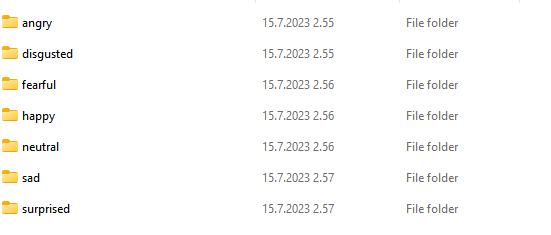

In [3]:
training_classes=os.listdir(train_dir)
for i in training_classes:
    print(i)

angry
disgusted
fearful
happy
neutral
sad
surprised


In [4]:
df_training = pd.DataFrame(training_classes, columns=['Training Classes'])
print("Training DataFrame:")
df_training

Training DataFrame:


,Training Classes
0,angry
1,disgusted
2,fearful
3,happy
4,neutral
5,sad
6,surprised


In [5]:
test_classes=os.listdir(train_dir)
for i in test_classes:
    print(i)

angry
disgusted
fearful
happy
neutral
sad
surprised


In [6]:
df_test = pd.DataFrame(test_classes, columns=['Test Classes'])
print("Test DataFrame:")
df_test

Test DataFrame:


,Test Classes
0,angry
1,disgusted
2,fearful
3,happy
4,neutral
5,sad
6,surprised


## Identify the features and the targets:


### Targets/labels: The target classes (the emotion categories)
#### Each class corresponds to a specific emotion category. The emotion categories include: 
- angry
- disgusted
- fearful
- happy
- neutral
- sad
- surprised


### Features:  The images
- the images serve as the features or inputs to the model. These images contain visual information that the model will use to make predictions about the corresponding emotions.
- the gray-scale images of faces with dimensions of 48x48 pixels. Each pixel in the image represents a feature value. The dataset consists of 35,685 examples of these images.

# Training set

In [7]:
# Get the list of subdirectories within the train directory
subdirectories = os.listdir(train_dir)

# Iterate over the subdirectories and display the image names as separate DataFrames
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    if os.path.isdir(subdirectory_path):
        image_names = os.listdir(subdirectory_path)
        sub_df = pd.DataFrame(image_names, columns=["Image Names"])
        print(f"Directory: {subdirectory}")
        print(sub_df)
        print("\n")

Directory: angry
     Image Names
0        im0.png
1        im1.png
2       im10.png
3      im100.png
4     im1000.png
...          ...
3990   im995.png
3991   im996.png
3992   im997.png
3993   im998.png
3994   im999.png

[3995 rows x 1 columns]


Directory: disgusted
    Image Names
0       im0.png
1       im1.png
2      im10.png
3     im100.png
4     im101.png
..          ...
431    im95.png
432    im96.png
433    im97.png
434    im98.png
435    im99.png

[436 rows x 1 columns]


Directory: fearful
     Image Names
0        im0.png
1        im1.png
2       im10.png
3      im100.png
4     im1000.png
...          ...
4092   im995.png
4093   im996.png
4094   im997.png
4095   im998.png
4096   im999.png

[4097 rows x 1 columns]


Directory: happy
     Image Names
0        im0.png
1        im1.png
2       im10.png
3      im100.png
4     im1000.png
...          ...
7210   im995.png
7211   im996.png
7212   im997.png
7213   im998.png
7214   im999.png

[7215 rows x 1 columns]


Directory: neut

### Displaying Images from training set

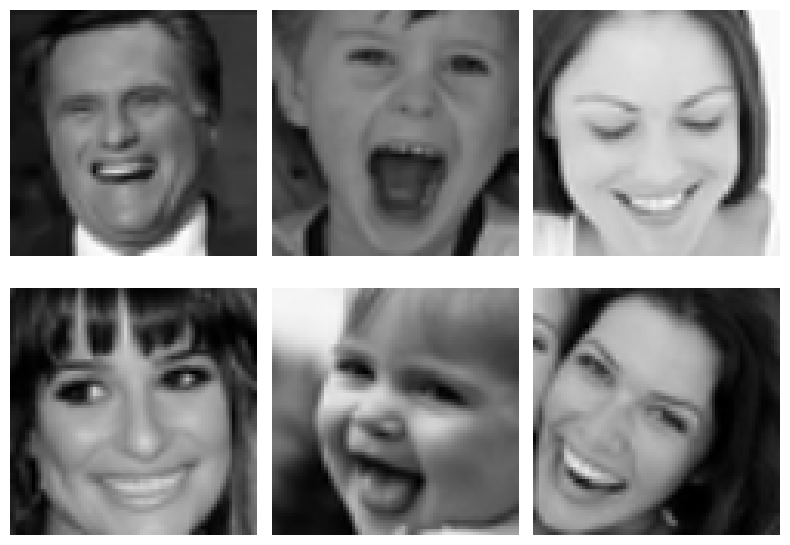

In [8]:
label = "happy"
num_images = 6
image_size = (80, 80)  # Specify the desired image size

# Get the path to the "happy" folder
happy_folder = os.path.join(train_dir, label)

# Get a list of image files from the "happy" folder
image_files = [os.path.join(happy_folder, file) for file in os.listdir(happy_folder)]

# Randomly select six images from the "happy" folder
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=num_images, replace=False)

# Display the selected images
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

for i, image_file in enumerate(random_image_files):
    # Load and scale the image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_scaled = cv2.resize(img_rgb, image_size)

    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_scaled)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Test set

In [9]:
# Get the list of subdirectories within the test directory
subdirectories = os.listdir(test_dir)

# Iterate over the subdirectories and display the image names as separate DataFrames
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(test_dir, subdirectory)
    if os.path.isdir(subdirectory_path):
        image_names = os.listdir(subdirectory_path)
        sub_df = pd.DataFrame(image_names, columns=["Image Names"])
        print(f"Directory: {subdirectory}")
        print(sub_df)
        print("\n")

Directory: angry
    Image Names
0       im0.png
1       im1.png
2      im10.png
3     im100.png
4     im101.png
..          ...
953   im957.png
954    im96.png
955    im97.png
956    im98.png
957    im99.png

[958 rows x 1 columns]


Directory: disgusted
    Image Names
0       im0.png
1       im1.png
2      im10.png
3     im100.png
4     im101.png
..          ...
106    im95.png
107    im96.png
108    im97.png
109    im98.png
110    im99.png

[111 rows x 1 columns]


Directory: fearful
     Image Names
0        im0.png
1        im1.png
2       im10.png
3      im100.png
4     im1000.png
...          ...
1019   im995.png
1020   im996.png
1021   im997.png
1022   im998.png
1023   im999.png

[1024 rows x 1 columns]


Directory: happy
     Image Names
0        im0.png
1        im1.png
2       im10.png
3      im100.png
4     im1000.png
...          ...
1769   im995.png
1770   im996.png
1771   im997.png
1772   im998.png
1773   im999.png

[1774 rows x 1 columns]


Directory: neutral
     Imag

### Displaying Images from test set

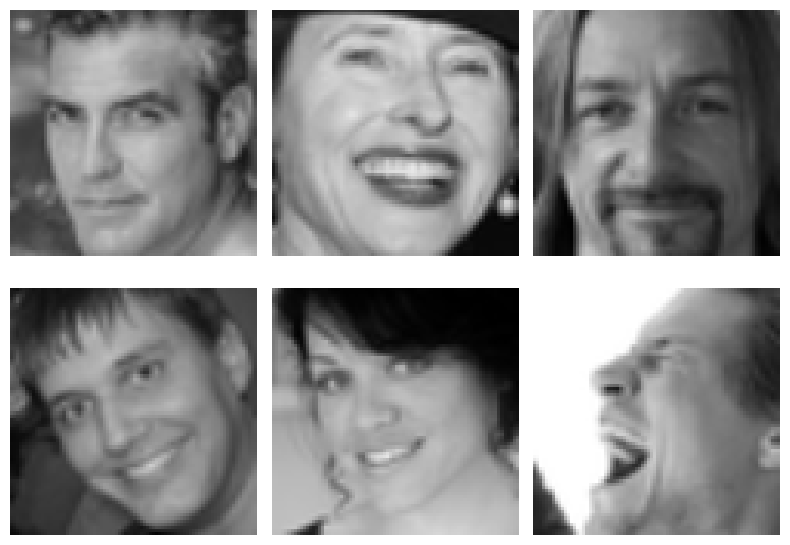

In [10]:
label = "happy"
num_images = 6
image_size = (80, 80)  # Specify the desired image size

# Get the path to the "happy" folder
happy_folder = os.path.join(test_dir, label)

# Get a list of image files from the "happy" folder
image_files = [os.path.join(happy_folder, file) for file in os.listdir(happy_folder)]

# Randomly select six images from the "happy" folder
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=num_images, replace=False)

# Display the selected images
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

for i, image_file in enumerate(random_image_files):
    # Load and scale the image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_scaled = cv2.resize(img_rgb, image_size)

    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_scaled)
    ax.axis("off")

plt.tight_layout()
plt.show()

# Information about the images 
## Inspecting Image Details in Training Dataset

In [12]:
print("Training Dataset: ")
# Get a list of subdirectories within the train directory
subdirectories = os.listdir(train_dir)

# Iterate over the subdirectories and analyze images
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path)]

    image_data = []
    for image_file in image_files:
        # Load the image and extract relevant information
        img = cv2.imread(image_file)
        height, width, channels = img.shape
        image_data.append([image_file, height, width, channels])

    # Create a DataFrame for the image information
    df_images = pd.DataFrame(image_data, columns=["Image File", "Height", "Width", "Channels"])

    # Display the information for the current directory
    print(f"Info of {subdirectory} directory:")
    df_images.info()
    print(f"\nDescription of {subdirectory} directory:")
    display(df_images.describe())
    print("\n")

Training Dataset: 
Info of angry directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  3995 non-null   object
 1   Height      3995 non-null   int64 
 2   Width       3995 non-null   int64 
 3   Channels    3995 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 125.0+ KB

Description of angry directory:


,Height,Width,Channels
count,3995.0,3995.0,3995.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of disgusted directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  436 non-null    object
 1   Height      436 non-null    int64 
 2   Width       436 non-null    int64 
 3   Channels    436 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.8+ KB

Description of disgusted directory:


,Height,Width,Channels
count,436.0,436.0,436.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of fearful directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  4097 non-null   object
 1   Height      4097 non-null   int64 
 2   Width       4097 non-null   int64 
 3   Channels    4097 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.2+ KB

Description of fearful directory:


,Height,Width,Channels
count,4097.0,4097.0,4097.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of happy directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7215 entries, 0 to 7214
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  7215 non-null   object
 1   Height      7215 non-null   int64 
 2   Width       7215 non-null   int64 
 3   Channels    7215 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.6+ KB

Description of happy directory:


,Height,Width,Channels
count,7215.0,7215.0,7215.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of neutral directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  4965 non-null   object
 1   Height      4965 non-null   int64 
 2   Width       4965 non-null   int64 
 3   Channels    4965 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 155.3+ KB

Description of neutral directory:


,Height,Width,Channels
count,4965.0,4965.0,4965.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of sad directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  4830 non-null   object
 1   Height      4830 non-null   int64 
 2   Width       4830 non-null   int64 
 3   Channels    4830 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 151.1+ KB

Description of sad directory:


,Height,Width,Channels
count,4830.0,4830.0,4830.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of surprised directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  3171 non-null   object
 1   Height      3171 non-null   int64 
 2   Width       3171 non-null   int64 
 3   Channels    3171 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 99.2+ KB

Description of surprised directory:


,Height,Width,Channels
count,3171.0,3171.0,3171.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0


### All images are size of 48x48 pixels and consist of 3 color channels (RGB)

## Inspecting Image Details in Test Dataset

In [13]:
print("test Dataset: ")
# Get a list of subdirectories within the test directory
subdirectories = os.listdir(test_dir)

# Iterate over the subdirectories and analyze images
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(test_dir, subdirectory)
    image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path)]

    image_data = []
    for image_file in image_files:
        # Load the image and extract relevant information
        img = cv2.imread(image_file)
        height, width, channels = img.shape
        image_data.append([image_file, height, width, channels])

    # Create a DataFrame for the image information
    df_images = pd.DataFrame(image_data, columns=["Image File", "Height", "Width", "Channels"])

    # Display the information for the current directory
    print(f"Info of {subdirectory} directory:")
    df_images.info()
    print(f"\nDescription of {subdirectory} directory:")
    display(df_images.describe())
    print("\n")


test Dataset: 
Info of angry directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  958 non-null    object
 1   Height      958 non-null    int64 
 2   Width       958 non-null    int64 
 3   Channels    958 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 30.1+ KB

Description of angry directory:


,Height,Width,Channels
count,958.0,958.0,958.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of disgusted directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  111 non-null    object
 1   Height      111 non-null    int64 
 2   Width       111 non-null    int64 
 3   Channels    111 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.6+ KB

Description of disgusted directory:


,Height,Width,Channels
count,111.0,111.0,111.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of fearful directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  1024 non-null   object
 1   Height      1024 non-null   int64 
 2   Width       1024 non-null   int64 
 3   Channels    1024 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 32.1+ KB

Description of fearful directory:


,Height,Width,Channels
count,1024.0,1024.0,1024.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of happy directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  1774 non-null   object
 1   Height      1774 non-null   int64 
 2   Width       1774 non-null   int64 
 3   Channels    1774 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 55.6+ KB

Description of happy directory:


,Height,Width,Channels
count,1774.0,1774.0,1774.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of neutral directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  1233 non-null   object
 1   Height      1233 non-null   int64 
 2   Width       1233 non-null   int64 
 3   Channels    1233 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 38.7+ KB

Description of neutral directory:


,Height,Width,Channels
count,1233.0,1233.0,1233.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of sad directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  1247 non-null   object
 1   Height      1247 non-null   int64 
 2   Width       1247 non-null   int64 
 3   Channels    1247 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 39.1+ KB

Description of sad directory:


,Height,Width,Channels
count,1247.0,1247.0,1247.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0




Info of surprised directory:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image File  831 non-null    object
 1   Height      831 non-null    int64 
 2   Width       831 non-null    int64 
 3   Channels    831 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.1+ KB

Description of surprised directory:


,Height,Width,Channels
count,831.0,831.0,831.0
mean,48.0,48.0,3.0
std,0.0,0.0,0.0
min,48.0,48.0,3.0
25%,48.0,48.0,3.0
50%,48.0,48.0,3.0
75%,48.0,48.0,3.0
max,48.0,48.0,3.0


## Get the distribution of the data
- Define the distribution based on the plot

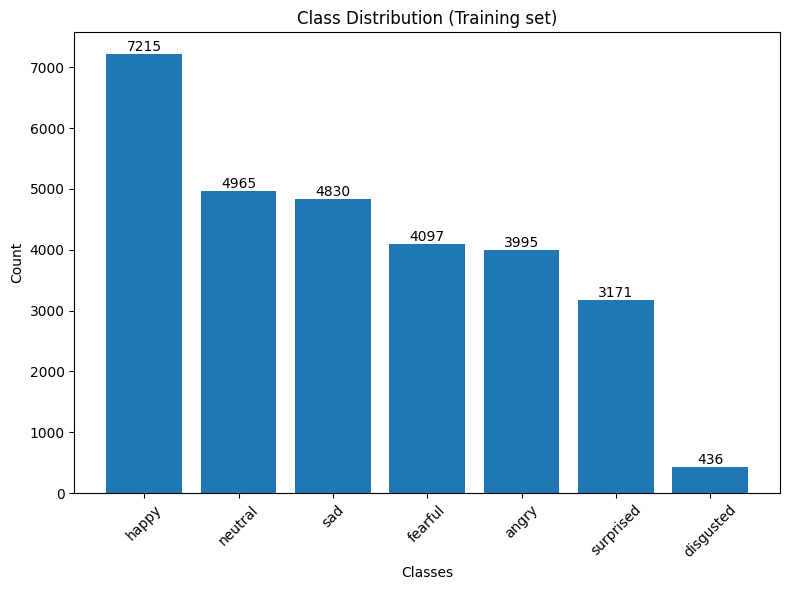

In [11]:
# Get a list of subdirectories within the train directory
subdirectories = os.listdir(train_dir)

# Count the number of images in each directory
class_counts = []
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    image_count = len(os.listdir(subdirectory_path))
    class_counts.append((subdirectory, image_count))

# Create a DataFrame for the class counts
df_class_counts = pd.DataFrame(class_counts, columns=["Class", "Count"])

# Sort the DataFrame by class count in descending order
df_class_counts = df_class_counts.sort_values(by="Count", ascending=False)

# Plot the class distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(df_class_counts["Class"], df_class_counts["Count"])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution (Training set)")
plt.xticks(rotation=45)

# Add count numbers at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()


### There is a significant class imbalance in the dataset. The "happy" class has a much larger number of images compared to the other classes, while the "disgusted" class has the fewest images.

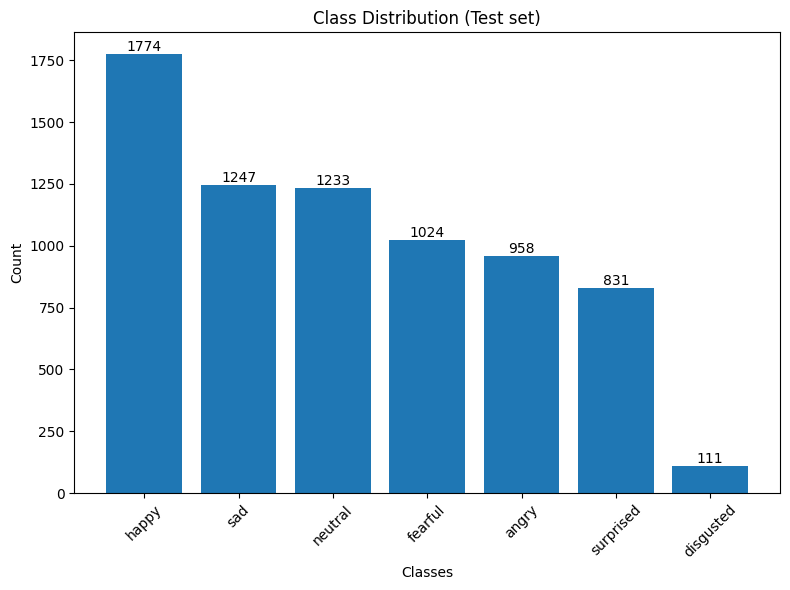

In [14]:
# Get a list of subdirectories within the train directory
subdirectories = os.listdir(test_dir)

# Count the number of images in each directory
class_counts = []
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(test_dir, subdirectory)
    image_count = len(os.listdir(subdirectory_path))
    class_counts.append((subdirectory, image_count))

# Create a DataFrame for the class counts
df_class_counts = pd.DataFrame(class_counts, columns=["Class", "Count"])

# Sort the DataFrame by class count in descending order
df_class_counts = df_class_counts.sort_values(by="Count", ascending=False)

# Plot the class distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(df_class_counts["Class"], df_class_counts["Count"])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution (Test set)")
plt.xticks(rotation=45)

# Add count numbers at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Clean your data(error, remove duplicates, missing values, outliers)

In [13]:
from data_cleaning_images import ImageDataChecker

# Create an instance of DataFrameChecker
checker = ImageDataChecker(train_dir)

# Call the checking functions
checker.check_errors() # empty images

Errors in Image Data:
No errors found in Image Data


## Image augmentation

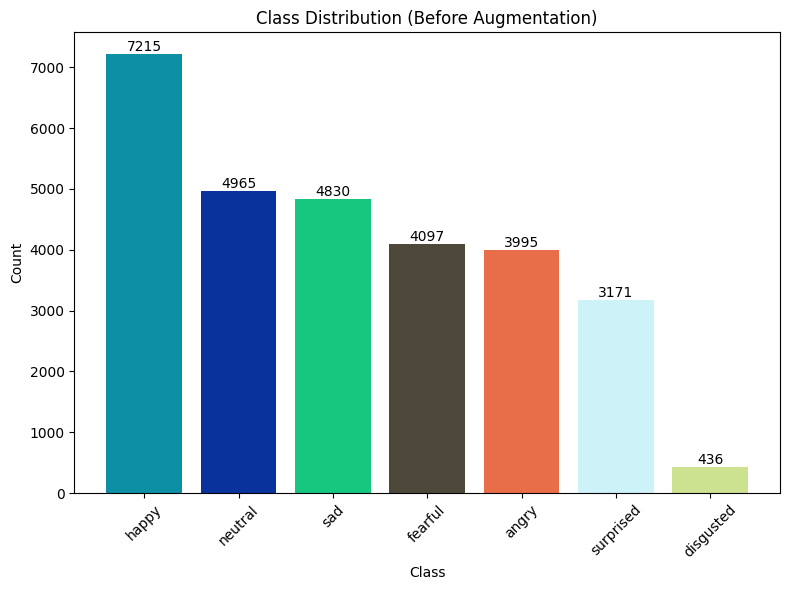

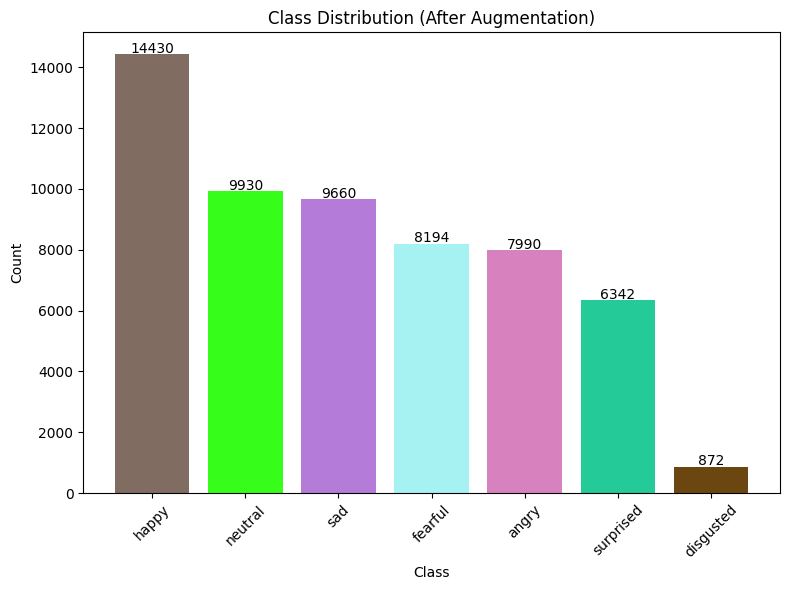

In [10]:
augmented_train_dir = "augmented_train"

# Create the augmented_train directory if it doesn't exist
os.makedirs(augmented_train_dir, exist_ok=True)

# Define image augmentation parameters
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
zoom_range = 0.2

# Define the image augmentation transformation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=horizontal_flip),
    transforms.RandomResizedCrop((48, 48)),
    transforms.RandomAffine(0, translate=(width_shift_range, height_shift_range)),  # affine transformations to the image, such as rotation, translation, and scaling
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # normalizes the pixel values of the image by subtracting the mean of 0.5 and dividing by the standard deviation of 0.5.
])

# Get a list of subdirectories within the train directory
subdirectories = os.listdir(train_dir)

# Count the number of images in each directory
class_counts_before = []
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    image_count = len(os.listdir(subdirectory_path))
    class_counts_before.append((subdirectory, image_count))

# Create a DataFrame for the class counts before augmentation
df_class_counts_before = pd.DataFrame(class_counts_before, columns=["Class", "Count"])

# Sort the DataFrame by class count in descending order
df_class_counts_before = df_class_counts_before.sort_values(by="Count", ascending=False)

# Plot the class distribution before augmentation
plt.figure(figsize=(8, 6))
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(1)]) for _ in range(len(df_class_counts_before))]
for i, count in enumerate(df_class_counts_before["Count"]):
    plt.text(i, count + 50, str(count), ha='center', color='black')
plt.bar(df_class_counts_before["Class"], df_class_counts_before["Count"], color=colors)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Before Augmentation)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform image augmentation and save augmented images
class_counts_after = []
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    augmented_subdirectory_path = os.path.join(augmented_train_dir, subdirectory)
    os.makedirs(augmented_subdirectory_path, exist_ok=True)
    image_count_before = len(os.listdir(subdirectory_path))
    class_counts_after.append((subdirectory, image_count_before))    
    for filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, filename)
        augmented_image_path = os.path.join(augmented_subdirectory_path, filename)
        image = Image.open(image_path)
        augmented_image = data_transform(image)
        augmented_image = (augmented_image * 255).type(torch.uint8)
        augmented_image = transforms.ToPILImage()(augmented_image)
        augmented_image.save(augmented_image_path)
        class_counts_after[-1] = (subdirectory, class_counts_after[-1][1] + 1)

# Create a DataFrame for the class counts after augmentation
df_class_counts_after = pd.DataFrame(class_counts_after, columns=["Class", "Count"])

# Sort the DataFrame by class count in descending order
df_class_counts_after = df_class_counts_after.sort_values(by="Count", ascending=False)

# Plot the class distribution after augmentation
plt.figure(figsize=(8, 6))
colors = [random.choice(['#'+format(random.randint(0, 16777215), '06x') for _ in range(1)]) for _ in range(len(df_class_counts_after))]
for i, count in enumerate(df_class_counts_after["Count"]):
    plt.text(i, count + 50, str(count), ha='center', color='black')
plt.bar(df_class_counts_after["Class"], df_class_counts_after["Count"], color=colors)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (After Augmentation)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  There is a significant class imbalance in the dataset. The "happy" class has a much larger number of samples compared to the other classes, while the "disgusted" class has the fewest samples.

###  Imbalanced classes can lead to biased predictions and poor performance, particularly for the minority classes.

# Model Training, Prediction, and Visualization

## Modelling with imbalanced dataset

## ○	Create three pytorch classes:

### First pytorch Class

In [ ]:
class EmotionDataset(Dataset):    
        """        
        The EmotionDataset class is responsible for handling the dataset, which includes tasks like loading the images, 
        managing the dataset structure, and providing an interface to access individual samples. 
        
        Args:
            data_dir (str): Directory path containing the data.
            transform (callable, optional): Optional transform to be applied to the data. Default is None.

        Attributes:
            data_dir (str): Directory path containing the data.
            transform (callable): Transform to be applied to the data.
            classes (list): List of class names (emotions) obtained from the data directory.
            data (list): List of tuples containing image paths and their corresponding labels.
        """
    def __init__(self, data_dir, transform=None):         
        #the constructor method that initializes an instance of the EmotionDataset object
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        # laoding the images from diffrent classes(imotions) directories
  
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        #the total number of samples in the dataset(total number of images in the dataset).
              
        return len(self.data)

    def __getitem__(self, idx):         
        #this method is responsible for retrieving a specific sample from the dataset.
        
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

### Second pytorch Class

In [ ]:
# Using different layers, we are trying to extract features from images and make predictions.

class EmotionModel(pl.LightningModule):
    # the EmotionModel class is responsible for modeling. 
    
    def __init__(self):   # performs the initialization steps
        
        super(EmotionModel, self).__init__()         # It is used to call the constructor of the parent class (pl.LightningModule).
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)     # It takes a grayscale input image with 1 channel, applies 32 filters of size 3x3, and adds padding of size 1 to the input.
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)   #it takes the output from self.conv1, which has 32 channels, applies 64 filters of size 3x3, and adds padding of size 1.
        self.bn1 = nn.BatchNorm2d(64)               # It normalizes the output from self.conv2 along the channel dimension (2nd dimension) to improve training stability.
        self.pool = nn.MaxPool2d(2, 2)              # It performs max pooling with a kernel size of 2x2 and a stride of 2, reducing the spatial dimensions of the input by half.
        self.dropout = nn.Dropout(0.25)            #It applies dropout with a probability of 0.25 to the input, randomly zeroing out elements during training to prevent overfitting.
        self.fc1 = nn.Linear(64 * 12 * 12, 100)    #it takes the output from the previous layers, which has a shape of 64x12x12, and maps it to a 1D tensor of size 100.
        self.fc2 = nn.Linear(100, 50)             #It takes the output from self.fc1, which has a size of 100, and maps it to a 1D tensor of size 50.
        self.fc3 = nn.Linear(50, 7)               # It takes the output from self.fc2, which has a size of 50, and maps it to a 1D tensor of size 7, representing the 7 different emotion classes.
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x): #The input data x is passed through the model (self(x)) to obtain the predicted output (y_hat).
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)                                                                                                         # The -1 indicates that the size of that dimension will be inferred based on the shape of the tensor. 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        # calculates the loss during the training process.
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        # responsible for evaluating the model's performance on the validation dataset. 
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        # responsible for evaluating the model's performance on the test dataset.
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)       #It creates an Adam optimizer, which is a popular optimization algorithm used for training neural networks.
                                                              #lr=0.0005: It sets the learning rate for the optimizer. 

### Third pytorch Class

In [ ]:
class EmotionDataModule(pl.LightningDataModule):
    # Responsible for preprocessing as well as it is responsible for setting up the data for training, validation, and testing.
    
    def __init__(self, train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size
    
    ## spliting data into training and test set
    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    # train_dataloader method loads data from training dataset
    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)
    
    # val_dataloader loads data from validation dataset
    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)
    
    # test dataloaded loads data from test set 
    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    # defines a set of transformations to be applied to the input data. 
    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])


## Model Training and Evaluation

In [47]:
# Set the data directories
train_dir = "train"
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=64)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=64` reached.


Training Accuracy: 0.7755
Validation Accuracy: 0.5402


### Emotion Prediction and Visualization

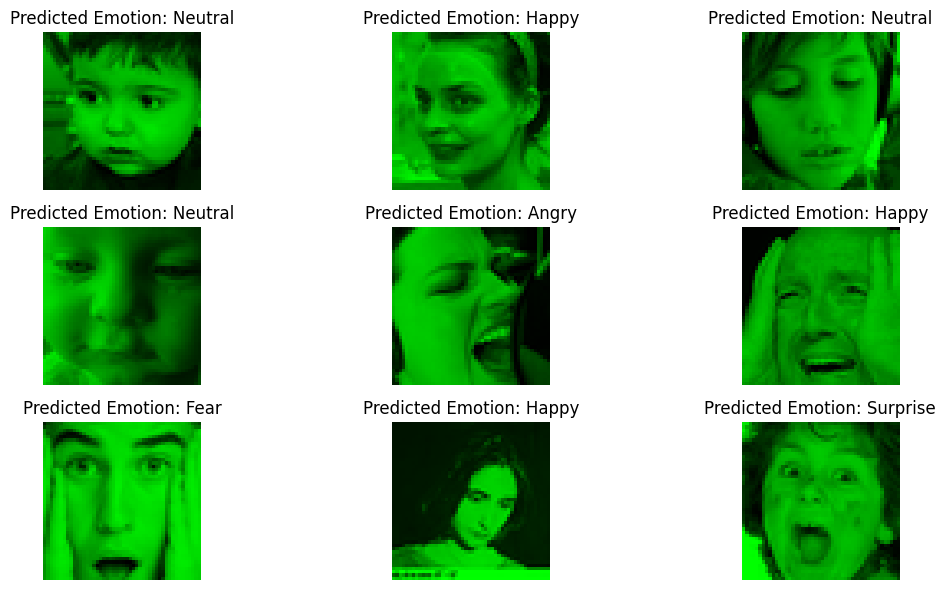

In [48]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


## Architechture of the model

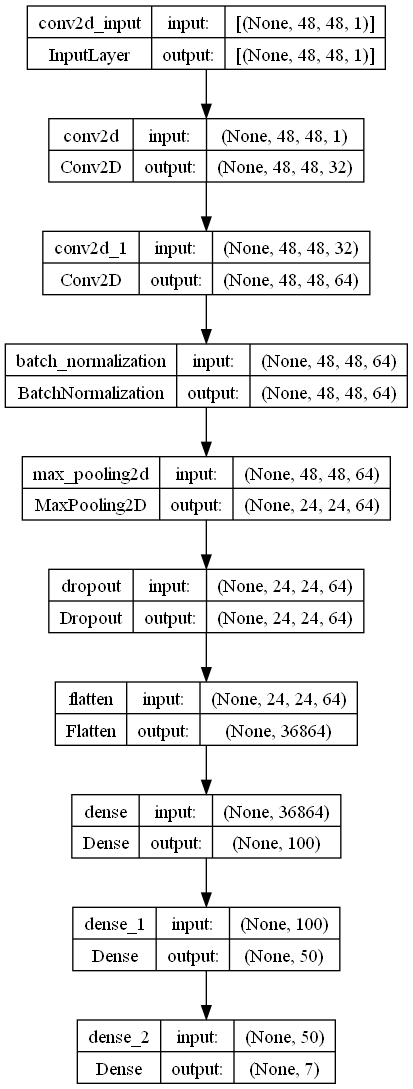

# Different approaches have been attempted to improve the model:

## Second best model of imbalanced dataset

In [54]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7) # 7 different emotions
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories
train_dir = "train"
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=125)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=125` reached.


Training Accuracy: 0.8101
Validation Accuracy: 0.5346


### Emotion Prediction and Visualization

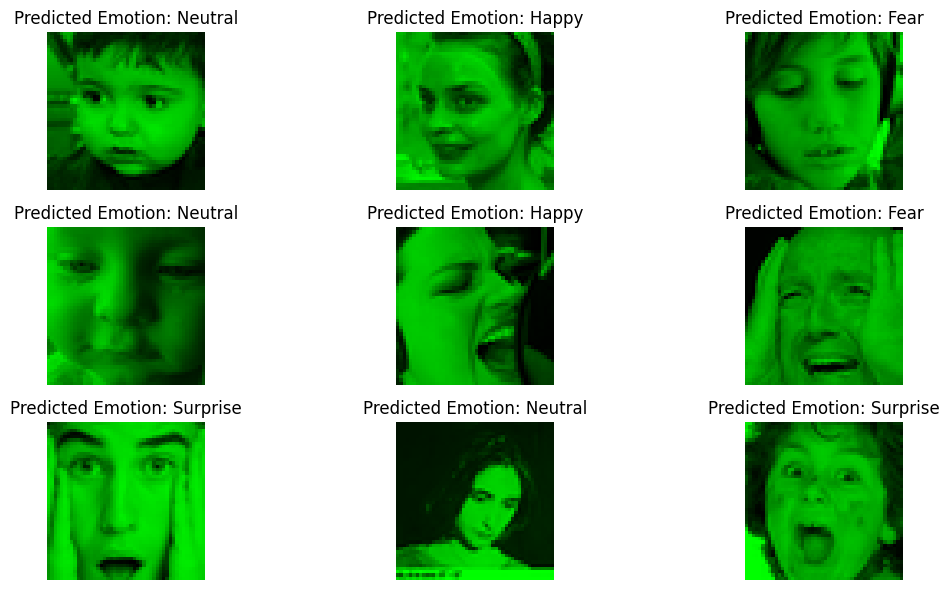

In [55]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()

In [49]:
train_dir = "train"
test_dir = "test"
augmented_train_dir = "augmented_train"
merged_train_dir = "merged_train"

# Create the merged_train directory if it doesn't exist
os.makedirs(merged_train_dir, exist_ok=True)

# Copy images from train_dir
for class_name in os.listdir(train_dir):
    class_train_dir = os.path.join(train_dir, class_name)
    class_merged_train_dir = os.path.join(merged_train_dir, class_name)
    os.makedirs(class_merged_train_dir, exist_ok=True)
    for file_name in os.listdir(class_train_dir):
        src = os.path.join(class_train_dir, file_name)
        dst = os.path.join(class_merged_train_dir, file_name)
        shutil.copy(src, dst)

# Copy 50% of the images from augmented_train_dir
for class_name in os.listdir(augmented_train_dir):
    class_augmented_train_dir = os.path.join(augmented_train_dir, class_name)
    class_merged_train_dir = os.path.join(merged_train_dir, class_name)
    os.makedirs(class_merged_train_dir, exist_ok=True)
    image_files = os.listdir(class_augmented_train_dir)
    selected_files = random.sample(image_files, k=int(len(image_files) * 0.5))
    for file_name in selected_files:
        src = os.path.join(class_augmented_train_dir, file_name)
        dst = os.path.join(class_merged_train_dir, file_name)
        shutil.copy(src, dst)

In [50]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, merged_train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.merged_train_dir = merged_train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.merged_train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories

merged_train_dir = "merged_train" #50% augmented
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(merged_train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=64)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=64` reached.


Training Accuracy: 0.7202
Validation Accuracy: 0.4770


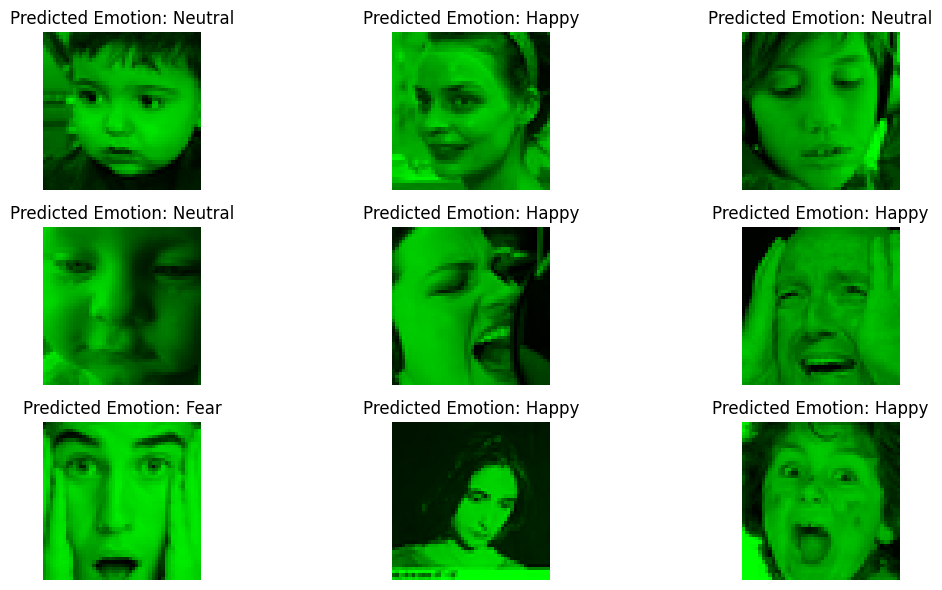

In [51]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()

### Good result, however, seems overfitting

In [23]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories
train_dir = "train"
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=64)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=64` reached.


Training Accuracy: 0.9272
Validation Accuracy: 0.5422


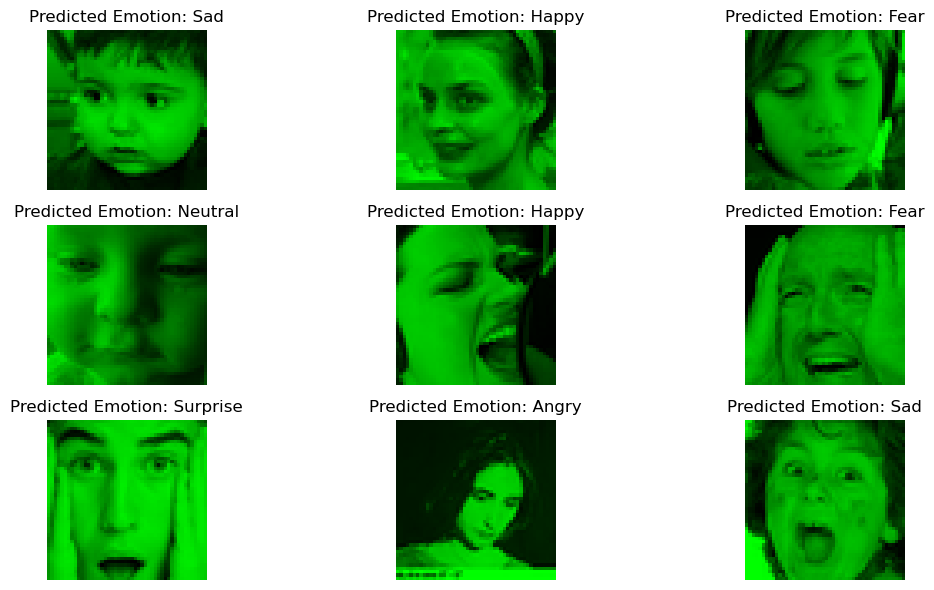

In [27]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()

# Set the data directory
test_dir = "test"

# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


### Increased the number of layers in the EmotionModel class to improve modeling performance.

In [52]:
class EmotionDataset(Dataset):
    #  The EmotionDataset class is responsible for handling the dataset. 
    
    def __init__(self, data_dir, transform=None):
        """
        Initialize the EmotionDataset object.

        Args:
            data_dir (str): Directory path containing the data.
            transform (callable, optional): Optional transform to be applied to the data. Default is None.

        Attributes:
            data_dir (str): Directory path containing the data.
            transform (callable): Transform to be applied to the data.
            classes (list): List of class names (emotions) obtained from the data directory.
            data (list): List of tuples containing image paths and their corresponding labels.
        """
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()
  
    
    def load_data(self):
        # laoding the images from diffreent classes(imotions) directories
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        #the total number of samples in the dataset(total number of images in the dataset).
        return len(self.data)

    def __getitem__(self, idx):
        #this method is responsible for retrieving a specific sample from the dataset.
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    # the EmotionModel class is responsible for modeling. 
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.dropout2 = nn.Dropout(0.25)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.dropout3 = nn.Dropout(0.25)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 6 * 6, 512)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout5 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.bn3(x)
        x = self.dropout3(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = F.relu(self.fc2(x))
        x = self.dropout5(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, merged_train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.merged_train_dir = merged_train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.merged_train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories
merged_train_dir = "merged_train" # 50% augmented
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(merged_train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=64)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type               | Params
-------------------------------------------------------
0  | conv1          | Conv2d             | 320   
1  | conv2          | Conv2d             | 18.5 K
2  | bn1            | BatchNorm2d        | 128   
3  | dropout1       | Dropout            | 0     
4  | conv3          | Conv2d             | 73.9 K
5  | conv4          | Conv2d             | 147 K 
6  | bn2            | BatchNorm2d        | 256   
7  | dropout2       | Dropout            | 0     
8  | conv5          | Conv2d             | 295 K 
9  | conv6          | Conv2d             | 590 K 
10 | bn3            | BatchNorm2d        | 512   
11 | dropout3       | Dropout            | 0     
12 | pool           | MaxPool2d          | 0     
13 | fc1            | Linear             | 4.7 M 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=64` reached.


Training Accuracy: 0.2512
Validation Accuracy: 0.2473


## Using additional layers in the model did not overfitting, but it led to a decrease in overall accuracy.

In [8]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image, label


class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)


class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, augmented_train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.augmented_train_dir = augmented_train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.augmented_train_dir, transform=self.get_transform(train=True))
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform(train=False))

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self, train):
        if train:
            data_transform = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomResizedCrop((48, 48)),
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])
        else:
            data_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])
        return data_transform


# Set the data directories
train_dir = "train"
test_dir = "test"
augmented_train_dir = "augmented_train"

# Create the augmented_train directory if it doesn't exist
os.makedirs(augmented_train_dir, exist_ok=True)

# Define image augmentation parameters
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
zoom_range = 0.2

# Define the image augmentation transformation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=horizontal_flip),
    transforms.RandomResizedCrop((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Get a list of subdirectories within the train directory
subdirectories = os.listdir(train_dir)

# Perform image augmentation and save augmented images
class_counts_after = []
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    augmented_subdirectory_path = os.path.join(augmented_train_dir, subdirectory)
    os.makedirs(augmented_subdirectory_path, exist_ok=True)
    image_count_before = len(os.listdir(subdirectory_path))
    class_counts_after.append((subdirectory, image_count_before))
    for filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, filename)
        augmented_image_path = os.path.join(augmented_subdirectory_path, filename)
        image = Image.open(image_path)
        augmented_image = data_transform(image)
        augmented_image = (augmented_image * 255).type(torch.uint8)
        augmented_image = transforms.ToPILImage()(augmented_image)
        augmented_image.save(augmented_image_path)
        class_counts_after[-1] = (subdirectory, class_counts_after[-1][1] + 1)

# Initialize the data module
data_module = EmotionDataModule(augmented_train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=32)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=32` reached.


Training Accuracy: 0.2897
Validation Accuracy: 0.3117


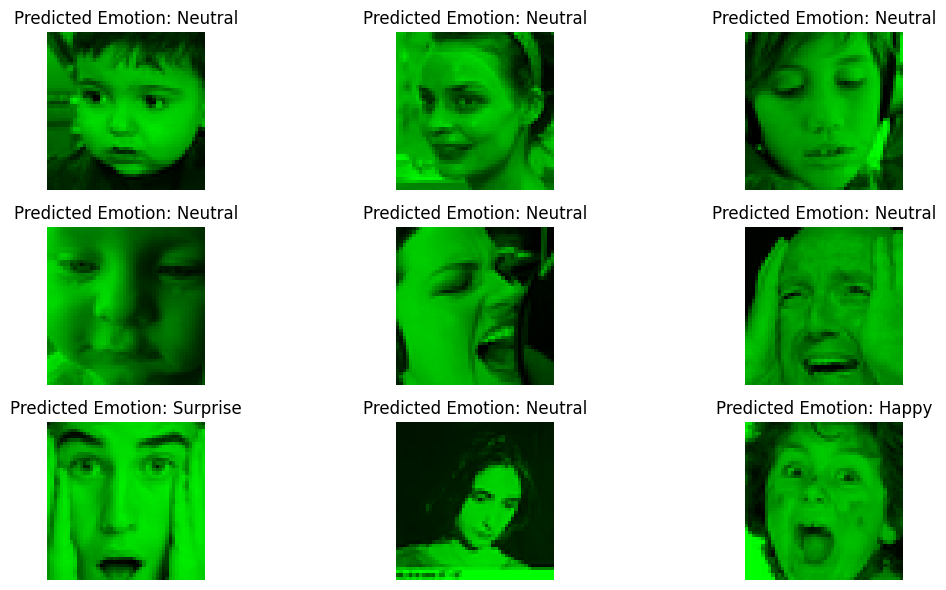

In [9]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [16]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.0005)

    def on_train_epoch_end(self):
        train_acc = self.train_accuracy.compute()
        val_acc = self.val_accuracy.compute()
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")


class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, augmented_train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.augmented_train_dir = augmented_train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.augmented_train_dir, transform=self.get_transform(train=True))
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform(train=False))

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self, train):
        if train:
            data_transform = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomResizedCrop((48, 48)),
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])
        else:
            data_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])
        return data_transform


# Set the data directories
train_dir = "train"
test_dir = "test"
augmented_train_dir = "augmented_train"

# Create the augmented_train directory if it doesn't exist
os.makedirs(augmented_train_dir, exist_ok=True)

# Define image augmentation parameters
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
zoom_range = 0.2

# Define the image augmentation transformation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=horizontal_flip),
    transforms.RandomResizedCrop((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Get a list of subdirectories within the train directory
subdirectories = os.listdir(train_dir)

# Perform image augmentation and save augmented images
class_counts_after = []
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    augmented_subdirectory_path = os.path.join(augmented_train_dir, subdirectory)
    os.makedirs(augmented_subdirectory_path, exist_ok=True)
    image_count_before = len(os.listdir(subdirectory_path))
    class_counts_after.append((subdirectory, image_count_before))
    for filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, filename)
        augmented_image_path = os.path.join(augmented_subdirectory_path, filename)
        image = Image.open(image_path)
        augmented_image = data_transform(image)
        augmented_image = (augmented_image * 255).type(torch.uint8)
        augmented_image = transforms.ToPILImage()(augmented_image)
        augmented_image.save(augmented_image_path)
        class_counts_after[-1] = (subdirectory, class_counts_after[-1][1] + 1)

# Initialize the data module
data_module = EmotionDataModule(augmented_train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=10)

# Train the model
trainer.fit(model, data_module)

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2433
Validation Accuracy: 0.2331


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2481
Validation Accuracy: 0.2329


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2502
Validation Accuracy: 0.2361


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2521
Validation Accuracy: 0.2431


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2537
Validation Accuracy: 0.2480


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2548
Validation Accuracy: 0.2517


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2565
Validation Accuracy: 0.2540


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2576
Validation Accuracy: 0.2553


Validation: 0it [00:00, ?it/s]

Training Accuracy: 0.2590
Validation Accuracy: 0.2576


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


Training Accuracy: 0.2608
Validation Accuracy: 0.2601
Training Accuracy: 0.2897
Validation Accuracy: 0.3117


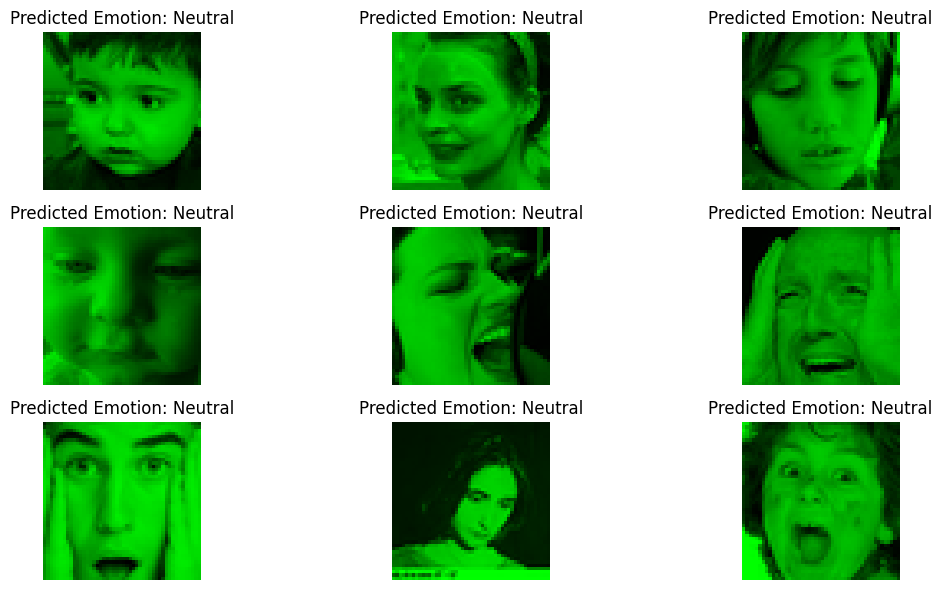

In [17]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


In [52]:
class EmotionDataset(Dataset):
    #  The EmotionDataset class is responsible for handling the dataset. 
    
    def __init__(self, data_dir, transform=None):
        """
        Initialize the EmotionDataset object.

        Args:
            data_dir (str): Directory path containing the data.
            transform (callable, optional): Optional transform to be applied to the data. Default is None.

        Attributes:
            data_dir (str): Directory path containing the data.
            transform (callable): Transform to be applied to the data.
            classes (list): List of class names (emotions) obtained from the data directory.
            data (list): List of tuples containing image paths and their corresponding labels.
        """
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()
  
    
    def load_data(self):
        # laoding the images from diffreent classes(imotions) directories
        
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        #the total number of samples in the dataset(total number of images in the dataset).
        return len(self.data)

    def __getitem__(self, idx):
        #this method is responsible for retrieving a specific sample from the dataset.
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    # the EmotionModel class is responsible for modeling. 
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.dropout2 = nn.Dropout(0.25)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.dropout3 = nn.Dropout(0.25)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 6 * 6, 512)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout5 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = self.bn3(x)
        x = self.dropout3(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = F.relu(self.fc2(x))
        x = self.dropout5(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, merged_train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.merged_train_dir = merged_train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.merged_train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories
merged_train_dir = "merged_train" # 50% augmented
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(merged_train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=64)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type               | Params
-------------------------------------------------------
0  | conv1          | Conv2d             | 320   
1  | conv2          | Conv2d             | 18.5 K
2  | bn1            | BatchNorm2d        | 128   
3  | dropout1       | Dropout            | 0     
4  | conv3          | Conv2d             | 73.9 K
5  | conv4          | Conv2d             | 147 K 
6  | bn2            | BatchNorm2d        | 256   
7  | dropout2       | Dropout            | 0     
8  | conv5          | Conv2d             | 295 K 
9  | conv6          | Conv2d             | 590 K 
10 | bn3            | BatchNorm2d        | 512   
11 | dropout3       | Dropout            | 0     
12 | pool           | MaxPool2d          | 0     
13 | fc1            | Linear             | 4.7 M 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=64` reached.


Training Accuracy: 0.2512
Validation Accuracy: 0.2473


# Modeling using balanced data:

## Balancing the data

In [13]:
train_dir = "train"
augmented_train_dir = "augmented_train"
balanced_train_dir = "balanced_train"
target_num_images = 6342 

# Create the augmented_train and balanced_train directories if they don't exist
os.makedirs(augmented_train_dir, exist_ok=True)
os.makedirs(balanced_train_dir, exist_ok=True)

# Perform image augmentation and save augmented images for directories with fewer images
for class_name in os.listdir(train_dir):
    class_train_dir = os.path.join(train_dir, class_name)
    class_augmented_train_dir = os.path.join(augmented_train_dir, class_name)
    os.makedirs(class_augmented_train_dir, exist_ok=True)
    
    # Get the actual number of images in the class directory
    num_images = len(os.listdir(class_train_dir))
    
    # If the number of images is less than the target number, perform augmentation
    if num_images < target_num_images:
        # Calculate the number of images to generate through augmentation
        num_augmented_images = target_num_images - num_images
        
        # Perform image augmentation and save augmented images
        image_files = os.listdir(class_train_dir)
        for i in range(num_augmented_images):
            # Randomly select an image from the existing images
            file_name = random.choice(image_files)
            image_path = os.path.join(class_train_dir, file_name)
            
            # Load the image and apply augmentation
            image = Image.open(image_path)
            augmented_image = data_transform(image)
            
            # Save the augmented image
            augmented_image_path = os.path.join(class_augmented_train_dir, f"augmented_{i}.jpg")
            augmented_image = (augmented_image * 255).type(torch.uint8)
            augmented_image = transforms.ToPILImage()(augmented_image)
            augmented_image.save(augmented_image_path)
    
    # Copy the original images to the augmented_train directory
    for file_name in os.listdir(class_train_dir):
        src = os.path.join(class_train_dir, file_name)
        dst = os.path.join(class_augmented_train_dir, file_name)
        shutil.copy(src, dst)

# Undersample the classes in augmented_train to achieve balance
for class_name in os.listdir(augmented_train_dir):
    class_augmented_train_dir = os.path.join(augmented_train_dir, class_name)
    class_balanced_train_dir = os.path.join(balanced_train_dir, class_name)
    os.makedirs(class_balanced_train_dir, exist_ok=True)
    
    # Get the actual number of images in the class directory
    num_images = len(os.listdir(class_augmented_train_dir))
    
    # Determine the number of images to select
    num_to_select = min(target_num_images, num_images)
    
    # Randomly select images
    image_files = os.listdir(class_augmented_train_dir)
    selected_files = random.sample(image_files, k=num_to_select)
    
    # Copy the selected images to the balanced_train directory
    for file_name in selected_files:
        src = os.path.join(class_augmented_train_dir, file_name)
        dst = os.path.join(class_balanced_train_dir, file_name)
        shutil.copy(src, dst)

# Count the number of images in each directory before and after balancing
class_counts_before = []
class_counts_after = []

for class_name in os.listdir(train_dir):
    class_train_dir = os.path.join(train_dir, class_name)
    class_balanced_train_dir = os.path.join(balanced_train_dir, class_name)
    
    num_images_before = len(os.listdir(class_train_dir))
    num_images_after = len(os.listdir(class_balanced_train_dir))
    
    class_counts_before.append((class_name, num_images_before))
    class_counts_after.append((class_name, num_images_after))

# Create DataFrames for the class counts before and after balancing
df_class_counts_before = pd.DataFrame(class_counts_before, columns=["Class", "Count (Before)"])
df_class_counts_after = pd.DataFrame(class_counts_after, columns=["Class", "Count (After)"])

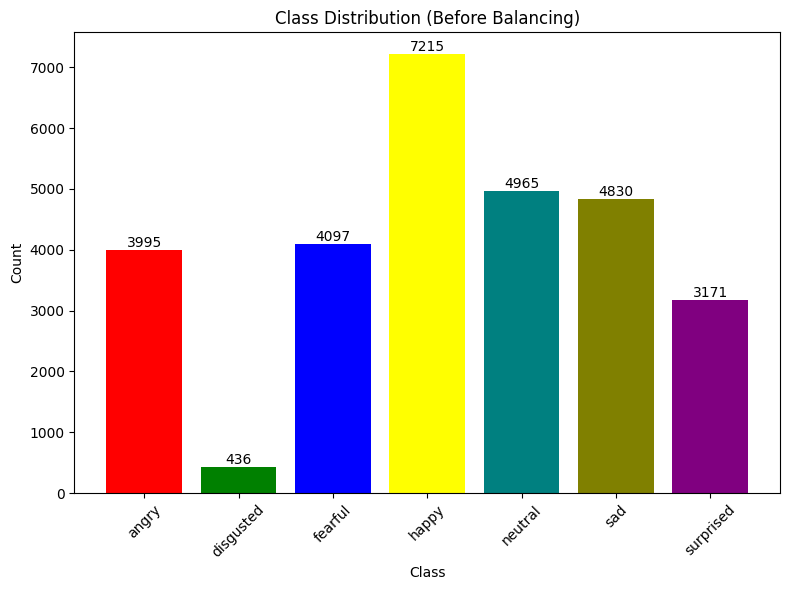

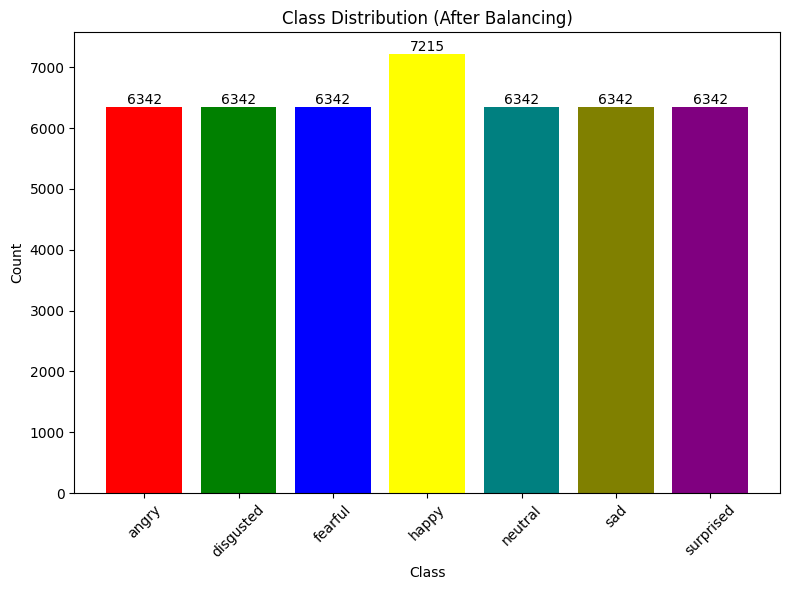

In [14]:
# Plot the class distribution before balancing
plt.figure(figsize=(8, 6))
colors_before = ['red', 'green', 'blue', 'yellow', 'teal', 'olive', 'purple']
for i, count in enumerate(df_class_counts_before["Count (Before)"]):
    plt.text(i, count + 50, str(count), ha='center', color='black')
plt.bar(df_class_counts_before["Class"], df_class_counts_before["Count (Before)"], color=colors_before)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Before Balancing)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the class distribution after balancing
plt.figure(figsize=(8, 6))
colors_after = ['red', 'green', 'blue', 'yellow', 'teal', 'olive', 'purple']
for i, count in enumerate(df_class_counts_after["Count (After)"]):
    plt.text(i, count + 50, str(count), ha='center', color='black')
plt.bar(df_class_counts_after["Class"], df_class_counts_after["Count (After)"], color=colors_after)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (After Balancing)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Modeling with balanced dataset

In [67]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    # spliting data into training and test set
    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())
    # train_dataloader method loads data from training dataset
    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)
    # validation loads data from test dataset
    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)
    # test dataloaded loads data from test set 
    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)
    # get_transform defines a set of transformations to be applied to the input data. 
    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories
train_dir = "balanced_train"
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=20)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


Training Accuracy: 0.6084
Validation Accuracy: 0.5131


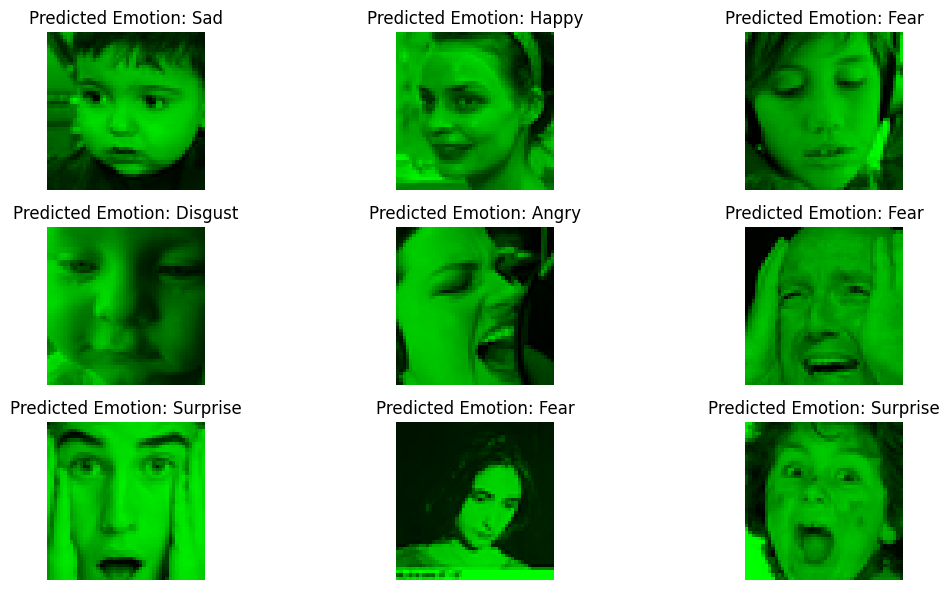

In [68]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## increasing number of epochs

In [69]:
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionModel(pl.LightningModule):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100) 
        self.fc2 = nn.Linear(100, 50) # fully connected (dense) layer 
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.train_accuracy(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(torch.log(y_hat), y)  # Compute the loss using negative log-likelihood loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.val_accuracy(y_hat, y)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.0005)

class EmotionDataModule(pl.LightningDataModule):
    def __init__(self, train_dir, test_dir, batch_size=32):
        super(EmotionDataModule, self).__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        self.batch_size = batch_size

    def setup(self, stage=None):
        self.train_dataset = EmotionDataset(self.train_dir, transform=self.get_transform())
        self.test_dataset = EmotionDataset(self.test_dir, transform=self.get_transform())

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

    def get_transform(self):
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

# Set the data directories
train_dir = "balanced_train"
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Initialize the trainer
trainer = pl.Trainer(max_epochs=125)

# Train the model
trainer.fit(model, data_module)

# Calculate the training and validation accuracies
train_acc = model.train_accuracy.compute()
val_acc = model.val_accuracy.compute()

# Save the trained model
torch.save(model.state_dict(), "emotion_model.pt")

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type               | Params
------------------------------------------------------
0 | conv1          | Conv2d             | 320   
1 | conv2          | Conv2d             | 18.5 K
2 | bn1            | BatchNorm2d        | 128   
3 | pool           | MaxPool2d          | 0     
4 | dropout        | Dropout            | 0     
5 | fc1            | Linear             | 921 K 
6 | fc2            | Linear             | 5.0 K 
7 | fc3            | Linear             | 357   
8 | train_accuracy | MulticlassAccuracy | 0     
9 | val_accuracy   | MulticlassAccuracy | 0     
------------------------------------------------------
946 K     Trainable params
0         Non-trainable params
946 K     Total params
3.784     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=125` reached.


Training Accuracy: 0.7431
Validation Accuracy: 0.5292


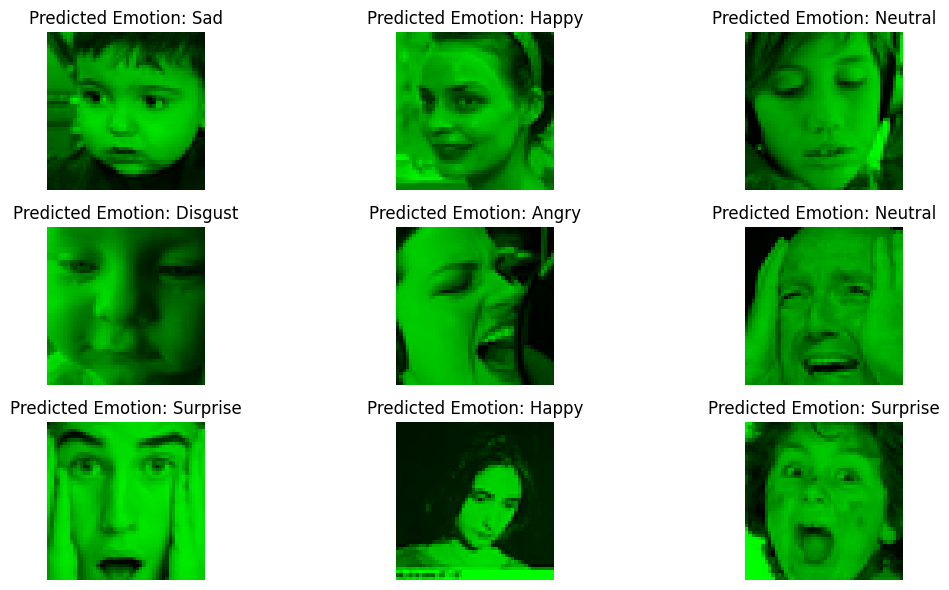

In [70]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()

#### Splitting data into traning, test and validation dataset:

In [ ]:

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from torchmetrics import Accuracy

# Define the EmotionDataset class
class EmotionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.data = self.load_data()

    def load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.data_dir, class_name)
            for file_name in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, file_name)
                data.append((image_path, self.classes.index(class_name)))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image, label

# Define the EmotionModel class
class EmotionModel(nn.Module):
    def __init__(self):
        super(EmotionModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 12 * 12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)
        self.train_accuracy = Accuracy(num_classes=7, task="multiclass")
        self.val_accuracy = Accuracy(num_classes=7, task="multiclass")

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)  # Apply softmax to obtain class probabilities
        return x

# Set the data directories
train_dir = "balanced_train"
test_dir = "test"

# Split the data into training, validation, and test sets
train_val_dataset = EmotionDataset(train_dir, transform=ToTensor())
test_dataset = EmotionDataset(test_dir, transform=ToTensor())

train_dataset, val_dataset = train_test_split(train_val_dataset, test_size=0.2, random_state=42)

# Define the custom collate function
def custom_collate_fn(batch):
    images, labels = zip(*batch)
    images = torch.stack(images)
    labels = torch.tensor(labels)
    return images, labels

# Initialize the data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=32, collate_fn=custom_collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=32, collate_fn=custom_collate_fn)

# Initialize the model
model = EmotionModel()

# Initialize the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(64):
    model.train()
    for images, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in val_dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        val_accuracy = correct / total
        print(f"Epoch {epoch+1}, Validation Accuracy: {val_accuracy:.4f}")

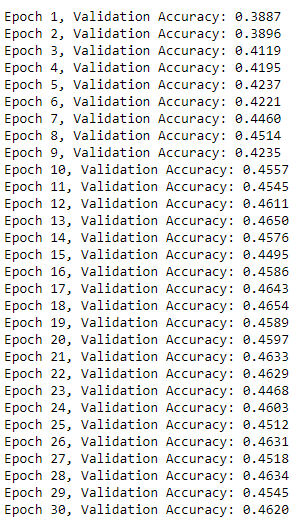
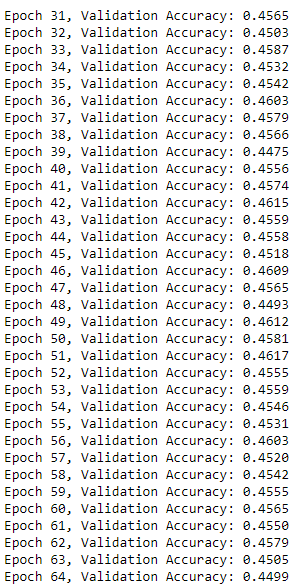

In [42]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Calculate the training and test accuracies
train_acc = calculate_accuracy(model, train_dataloader)
test_acc = calculate_accuracy(model, test_dataloader)

# Print the prediction accuracies
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.7929
Test Accuracy: 0.5040


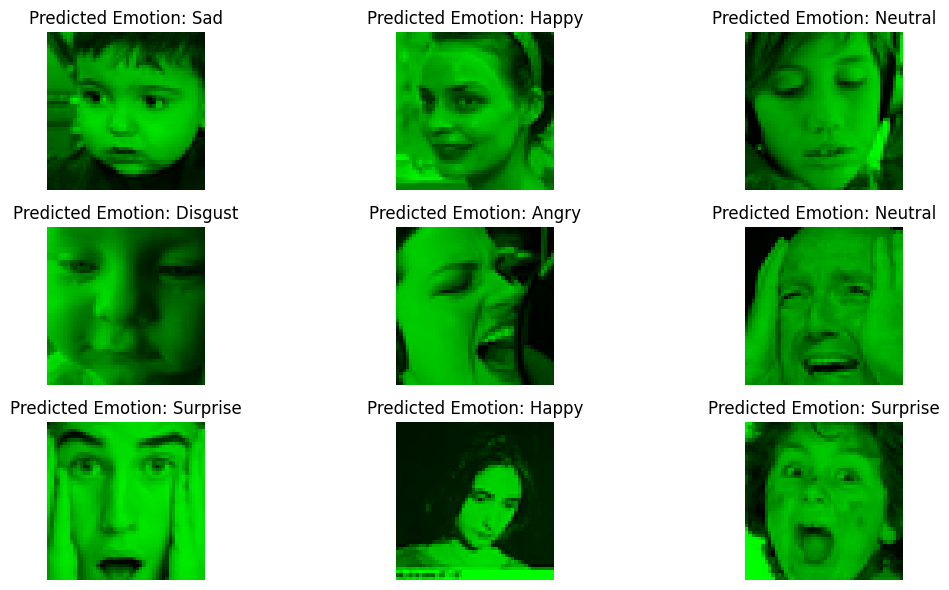

In [44]:
# Define the label dictionary
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load the trained model
model = EmotionModel()
model.load_state_dict(torch.load("emotion_model.pt"))
model.eval()


# Get a list of image files from the test directory
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        image_files.append(os.path.join(root, file))

# Randomly select six images from the test set
np.random.seed(42)
random_image_files = np.random.choice(image_files, size=9, replace=False)

# Process and predict emotions for each image
num_images = len(random_image_files)
num_rows = (num_images + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

for i, image_file in enumerate(random_image_files):
    # Load and preprocess the image
    img = cv.imread(image_file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_resized = cv.resize(img_gray, (48, 48))
    img_normalized = img_resized / 255.0

    # Convert the image to a tensor
    tensor_img = torch.tensor(img_normalized, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Make the prediction
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted_label = torch.max(output, 1)
        predicted_emotion = label_dict[predicted_label.item()]

    # Create a single-color image
    color = (0, 255, 0)  # Green color
    img_color = np.zeros_like(img)
    img_color[..., 1] = img_gray

    # Display the single-color image and predicted emotion
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.imshow(img_color)
    ax.set_title(f"Predicted Emotion: {predicted_emotion}")
    ax.axis("off")

# Remove any empty subplots
if num_images < num_rows * 3:
    for i in range(num_images, num_rows * 3):
        row = i // 3
        col = i % 3
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Plot the loss/performance of Train and Validation using both tensorboard and matplotlib.

### Plotting using matplotlib

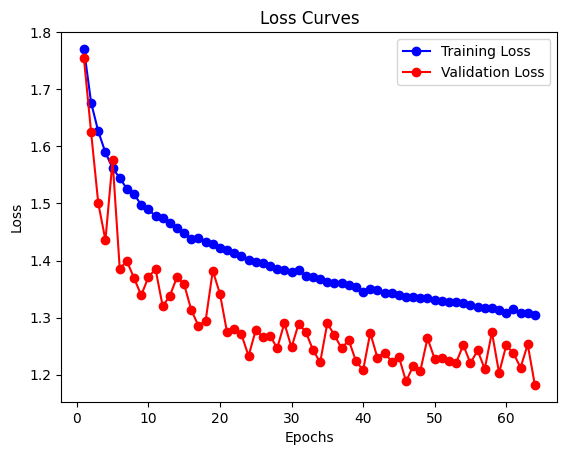

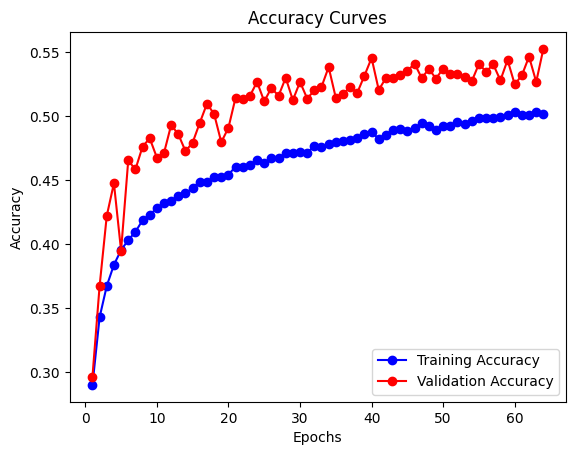

In [16]:
# Plot loss curves
plt.plot(epochs, train_loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(epochs, train_acc, "bo-", label="Training Accuracy")
plt.plot(epochs, val_acc, "ro-", label="Validation Accuracy")
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Loss curves
#### The training loss consistently decreases over the epochs, indicating that the model is learning and improving its performance. The gradual decrease in training loss suggests that the model is effectively capturing the patterns in the training data.

##### The validation loss also decreases from an initial value of 1.8 to 1.2, which indicates that the model is learning and improving its predictive ability. However, the presence of fluctuations in the validation loss suggests that the model might encounter certain challenges or variations in the validation data that cause temporary increases in loss.

#### Overall, the decreasing trend in both training and validation loss indicates that the model is learning and making progress. 
####  since it hasn't converged yet (accuracy still increasing after 60 epochs), it would be beneficial to train the model for more epochs to get even better performance

### Plotting using Tensorboard 

In [2]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 16132), started 1 day, 13:28:48 ago. (Use '!kill 16132' to kill it.)

## Confusion matrix:

In [28]:
# Set the data directories
train_dir = "balanced_train"
test_dir = "test"

# Initialize the data module
data_module = EmotionDataModule(train_dir, test_dir)

# Initialize the model
model = EmotionModel()

# Load the trained model weights
model.load_state_dict(torch.load("emotion_model.pt"))

# Initialize the test dataset
test_dataset = EmotionDataset(test_dir, transform=data_module.transform)

# Initialize the test data loader
test_dataloader = DataLoader(test_dataset, batch_size=data_module.batch_size)

# Set the model in evaluation mode
model.eval()

# Create empty lists to store the predicted labels and true labels
predicted_labels = []
true_labels = []

# Iterate over the test data loader
for batch in test_dataloader:
    images, labels = batch
    
    # Forward pass through the model to get the predicted probabilities
    with torch.no_grad():
        probabilities = model(images)
    
    # Get the predicted labels by taking the argmax of the probabilities
    batch_predictions = torch.argmax(probabilities, dim=1)
    
    # Append the predicted labels and true labels to the respective lists
    predicted_labels.extend(batch_predictions.tolist())
    true_labels.extend(labels.tolist())

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
confusion_mat

Confusion Matrix:


array([[ 402,   12,   98,  112,  135,  171,   28],
       [  41,    5,   16,    8,   17,   23,    1],
       [ 125,    6,  372,   95,  172,  184,   70],
       [  78,    5,   61, 1365,  126,  103,   36],
       [ 112,    3,   98,  170,  633,  195,   22],
       [ 165,    6,  145,  156,  276,  469,   30],
       [  33,    1,   98,   52,   60,   36,  551]], dtype=int64)

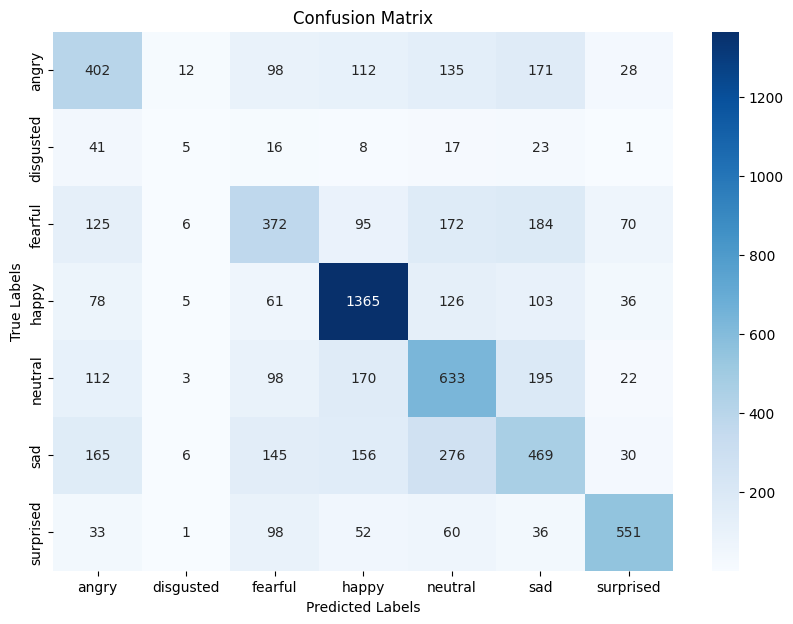

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class names
class_names = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Compute the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Create a DataFrame from the confusion matrix
df_cm = pd.DataFrame(confusion_mat, index=class_names, columns=class_names)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Interpretation of the confusion matrix:
#### Happy faces are classified best: 1365 out of 78+5+61+1365+126+103+36=1772 happy faces (77%) are classified as happy.
#### Performance on the other emotions is quite good.
#### For some reason, "disgusted" is almost never classified correctly. 

#### I think, even I rebalaced the data, it should be difficult for the model to learn about 'distugsted' faces, because it has very little variety in the training data (only 436 unique images -- even if I duplicate them, I won't get more variety in the set of 'disgusted' faces). This is why for disgusted did not performed well.

### The model became excellent in recognizing 'happy' faces and quite good in the others as well, except disgust, for which there was very little training data.

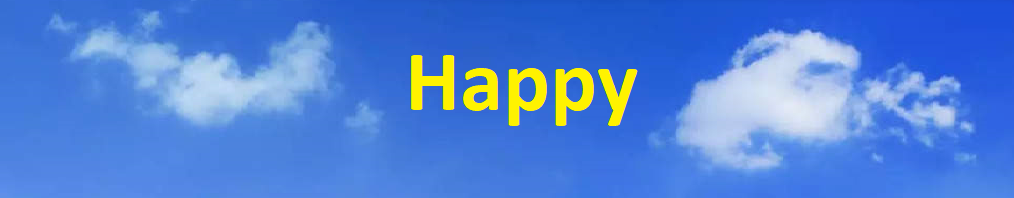